In [1]:
import sys
sys.path.append('/home/semik/projekty/noncanonical_introns/')

import pathlib
pathlib.Path().absolute()

import introns
import intron_comparison
from collections import defaultdict
from tabulate import tabulate

In [2]:
path="/mnt/archive/euglena_genomy/"
path2="/home/semik/projekty/noncanonical_introns/"

genom_EG=path+"gracilis/gracilis_dbg2olc.fasta"
geny_EG=path+"gracilis/gracilis_stringtie_strand_informed.gtf"
geny_EG_rev=path2+"gracilis_stringtie_strand_informed_reversed.gtf"

genom_EH=path+'hiemalis/hiemalis_rascaf.fasta'
geny_EH=path+'hiemalis/stringtie_strand_informed3.gtf'
geny_EH_rev=path2+"stringtie_strand_informed3_reversed.gtf"

genom_EL=path+'longa/longa_rascaf.fasta'
geny_EL=path+'longa/longa_stringtie_strand_informed.gtf'
geny_EL_rev=path2+"longa_stringtie_strand_informed_reversed.gtf"

genom_bugtest = '/home/semik/projekty/noncanonical_introns/bugtest.fasta'
geny_bugtest = '/home/semik/projekty/noncanonical_introns/bugtest.gtf'
geny_bugtest_rev = '/home/semik/projekty/noncanonical_introns/bugtest_reversed.gtf'

In [3]:
def create(genome,genes):
    genome_eug = introns.read_genome(genome)
    genes_eug = introns.read_genes(genes)

    for name, gene in list(genes_eug.items()):
        gene.extract_sequence(genome_eug)
        gene.create_introns()
        for intron in gene.introns:
                intron.conventional_version()
                intron.nonconventional_version()
    return genome_eug,genes_eug

def create_both(genome,genes,genes_rev):   
    '''def create_genes(genes_type):
        for name, gene in list(genes_type.items()):
            gene.extract_sequence(genome_eug)
            gene.create_introns()
            for intron in gene.introns:
                intron.conventional_version()
                intron.nonconventional_version()'''

    #genome_eug = introns.read_genome(genome)
    #genes_eug = introns.read_genes(genes)
    #genes_eug_rev = introns.read_genes(genes_rev)
    
    genome_eug, genes_eug = create(genome,genes)
    genome_eug,genes_eug_rev = create(genome,genes_rev)
    
    return genome_eug,genes_eug, genes_eug_rev
    
def stats(genome_eug,genes_eug):  
    conv_count=0
    nconv_count=0
    both_count=0
    all_count=0
    non_count=0
    conventional_classes=[0,0,0,0,0,0,0,0]
    nonconventional_classes=[0,0,0,0,0,0,0,0,0,0,0]

    for name, gene in list(genes_eug.items()):
        for intron in gene.introns:
            all_count+=1

            if intron.best_nonconv_var:
                nonconventional_classes[intron.best_nonconv_var-1]+=1
                nconv_count+=1

            if intron.best_conv_var:
                conventional_classes[intron.best_conv_var-1]+=1
                conv_count+=1
                if intron.best_nonconv_var:
                    both_count+=1
            elif not intron.best_nonconv_var:
                non_count+=1
    #print("\nKonwencjonalne: %d, niekonwencjonalne: %d, oba: %d inne: %d, wszystkie: %d" %(conv_count,nconv_count, both_count,non_count,all_count))
    return conventional_classes, nonconventional_classes, conv_count,nconv_count, both_count,non_count,all_count

In [4]:
genome_bugtest, genes_bugtest, genes_bugtest_rev = create_both(genom_bugtest, geny_bugtest, geny_bugtest_rev)
genome_EG, genes_EG, genes_EG_rev = create_both(genom_EG, geny_EG, geny_EG_rev)
genome_EH, genes_EH, genes_EH_rev = create_both(genom_EH, geny_EH, geny_EH_rev)
genome_EL, genes_EL, genes_EL_rev = create_both(genom_EL, geny_EL, geny_EL_rev)

STRG.10349.1 Backbone_42431 34332 34869
STRG.23469.1 Backbone_16422 19738 20179
STRG.26943.1 Backbone_27702 5991 6323
STRG.56728.1 Backbone_6313 2584 3004
STRG.63148.1 Backbone_13174 3308 3718
STRG.88595.1 Backbone_27075 12309 12861
STRG.88966.1 Backbone_28175 71421 71751
STRG.98591.1 Backbone_63165 4298 4949
STRG.101419.1 Backbone_76035 2888 3274
STRG.116446.1 Backbone_52206 27859 28061
STRG.118214.1 Backbone_59266 26843 27109
STRG.138399.1 Backbone_55817 12402 12603
STRG.143276.1 Backbone_75817 1029 1256
STRG.161059.1 Backbone_63198 5177 5410
STRG.186564.1 Backbone_83739 5483 6006
STRG.187684.1 Backbone_10410 50126 50389
STRG.199313.1 Backbone_48610 16136 16387
STRG.205627.1 Backbone_75270 36904 37164
STRG.10349.1 Backbone_42431 34332 34869
STRG.23469.1 Backbone_16422 19738 20179
STRG.26943.1 Backbone_27702 5991 6323
STRG.56728.1 Backbone_6313 2584 3004
STRG.63148.1 Backbone_13174 3308 3718
STRG.88595.1 Backbone_27075 12309 12861
STRG.88966.1 Backbone_28175 71421 71751
STRG.98591.1 B

In [5]:
def liczenie_intronow_dla_dwoch(genes, genes_rev):
    l1, l2= [i[1] for i in list(genes.items())], [i[1] for i in list(genes_rev.items())]
    print("dlugosci", len(l1)==len(l2))
    conv_l1, nonconv_l1, conv_l2, nonconv_l2 = 0,0,0,0
    for i in range(len(l1)):
        for j in range(len(l1[i].introns)):
            int1,int2=l1[i].introns[j], l2[i].introns[j]
            if int1.best_conv_var: conv_l1+=1
            if int2.best_conv_var: conv_l2+=1
            if int1.best_nonconv_var: nonconv_l1 += 1
            if int2.best_nonconv_var: nonconv_l2 += 1
    wynik=[["dobry kierunek", conv_l1, nonconv_l1], ["reversed",conv_l2, nonconv_l2]]
    headers=['konwencjonalne', 'niekonwencjonalne']
    print(tabulate(wynik, headers=headers))
    print("Czy jest wiecej konwencjonalnych w dobrym kierunku:", conv_l1>conv_l2,", czy jest wiecej niekonwencjonalnych:", nonconv_l1>nonconv_l2)

In [6]:
print('gracilis')
liczenie_intronow_dla_dwoch(genes_EG, genes_EG_rev)
print('\nhiemalis')
liczenie_intronow_dla_dwoch(genes_EH, genes_EH_rev)
print('\nlonga')
liczenie_intronow_dla_dwoch(genes_EL, genes_EL_rev)

gracilis
dlugosci True
                  konwencjonalne    niekonwencjonalne
--------------  ----------------  -------------------
dobry kierunek            182332               391663
reversed                  181901               389616
Czy jest wiecej konwencjonalnych w dobrym kierunku: True , czy jest wiecej niekonwencjonalnych: True

hiemalis
dlugosci True
                  konwencjonalne    niekonwencjonalne
--------------  ----------------  -------------------
dobry kierunek            169923               309659
reversed                   43744               212135
Czy jest wiecej konwencjonalnych w dobrym kierunku: True , czy jest wiecej niekonwencjonalnych: True

longa
dlugosci True
                  konwencjonalne    niekonwencjonalne
--------------  ----------------  -------------------
dobry kierunek             46608                83165
reversed                   41434                76158
Czy jest wiecej konwencjonalnych w dobrym kierunku: True , czy jest wiecej niekonw

In [7]:
Ms=[]
#for name,genome,genes,genes_rev in [("bugtest reversed", genom,geny,geny_rev)]:
for name,genome,genes,genes_rev in [("bugtest reversed", genome_bugtest, genes_bugtest, genes_bugtest_rev), ("gracilis reversed",genome_EG, genes_EG, genes_EG_rev), ("hiemalis reversed", genome_EH, genes_EH, genes_EH_rev), ("longa reversed",genome_EL, genes_EL, genes_EL_rev)]:
    #genome_eug, genes_eug=create(genome,genes)
    conventional_classes, nonconventional_classes, conv_count,nconv_count, both_count,non_count,all_count = stats(genome, genes)
    #genome_eug, genes_eug_rev=create(genome,genes_rev)
    conventional_classes_rev, nonconventional_classes_rev, conv_count_rev,nconv_count_rev, both_count_rev,non_count_rev,all_count_rev = stats(genome, genes_rev)
    M=[name, ["typ","konwencjonalne","niekonwencjonalne","oba","inne","wszystkie"],["dobre",conv_count,nconv_count, both_count,non_count,all_count],["reversed",conv_count_rev,nconv_count_rev, both_count_rev,non_count_rev,all_count_rev]]
    Ms.append(M)

In [8]:
for M in Ms:
    print("\n", M[0])
    print(tabulate(M[2:], headers=M[1]))


 bugtest reversed
typ         konwencjonalne    niekonwencjonalne    oba    inne    wszystkie
--------  ----------------  -------------------  -----  ------  -----------
dobre                    5                   11      3       9           22
reversed                 0                    6      0      16           22

 gracilis reversed
typ         konwencjonalne    niekonwencjonalne    oba    inne    wszystkie
--------  ----------------  -------------------  -----  ------  -----------
dobre               182332               391663  58022  499714      1015687
reversed            181901               389616  57760  501930      1015687

 hiemalis reversed
typ         konwencjonalne    niekonwencjonalne    oba    inne    wszystkie
--------  ----------------  -------------------  -----  ------  -----------
dobre               169923               309659  53318  247726       673990
reversed             43744               212135  14984  433095       673990

 longa reversed
typ         

In [9]:
klasy,counts=[],[]
for name,genome,genes in [("gracilis",genome_EG, genes_EG), ("hiemalis", genome_EH, genes_EH), ("longa",genome_EL, genes_EL)]:
#for name,genome,genes in [("gracilis reversed",genom_EG,geny_EG_rev), ("hiemalis reversed", genom_EH,geny_EH_rev), ("longa reversed",genom_EL,geny_EL_rev)]:
    print("\n",name)
    conventional_classes, nonconventional_classes, conv_count,nconv_count, both_count,non_count,all_count = stats(genome,genes)
    print("Konwencjonalne: %d, niekonwencjonalne: %d, oba: %d inne: %d, wszystkie: %d" %(conv_count,nconv_count, both_count,non_count,all_count))
    klasy.append([name,[i/all_count for i in conventional_classes],[i/all_count for i in nonconventional_classes]])
    counts.append([name, conv_count/all_count,nconv_count/all_count, both_count/all_count,non_count/all_count,all_count])


 gracilis
Konwencjonalne: 182332, niekonwencjonalne: 391663, oba: 58022 inne: 499714, wszystkie: 1015687

 hiemalis
Konwencjonalne: 169923, niekonwencjonalne: 309659, oba: 53318 inne: 247726, wszystkie: 673990

 longa
Konwencjonalne: 46608, niekonwencjonalne: 83165, oba: 14426 inne: 105924, wszystkie: 221271


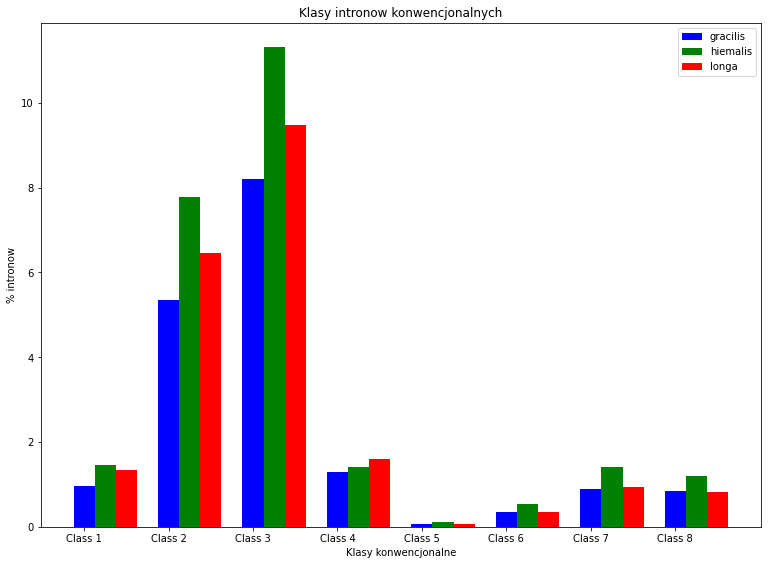

In [10]:
import numpy as np
import matplotlib.pyplot as plt
lista1=[i[1] for i in klasy]
data=[[j*100 for j in l] for l in lista1]
labels=[i[0] for i in klasy]
X = np.arange(8)
fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([0,0,1,1])
r1=ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
r2=ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
r3=ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)
ax.set_title('Klasy intronow konwencjonalnych')
ax.set_xlabel('Klasy konwencjonalne')
ax.set_ylabel('% intronow')
ax.set_xticks(X)
ax.set_xticklabels(('Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8'))
ax.legend(labels)

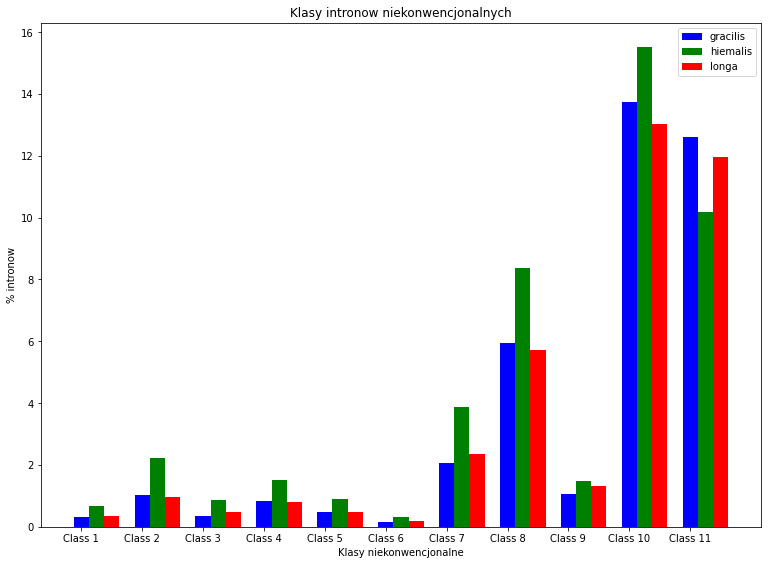

In [11]:
import numpy as np
import matplotlib.pyplot as plt
lista1=[i[2] for i in klasy]
data=[[j*100 for j in l] for l in lista1]
labels=[i[0] for i in klasy]
Y = np.arange(11)
fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([0,0,1,1])
ax.bar(Y + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(Y + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(Y + 0.50, data[2], color = 'r', width = 0.25)
ax.set_title('Klasy intronow niekonwencjonalnych')
ax.set_xlabel('Klasy niekonwencjonalne')
ax.set_ylabel('% intronow')
ax.set_xticks(Y)
ax.set_xticklabels(('Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9', 'Class 10', 'Class 11'))
ax.legend(labels)

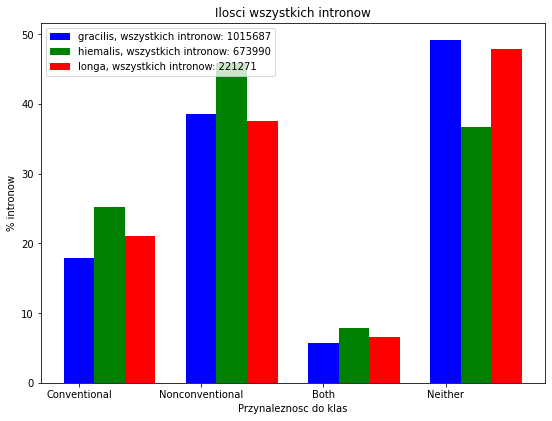

In [12]:
import numpy as np
import matplotlib.pyplot as plt
data=[[j*100 for j in l[1:-1]] for l in counts]
labels=[i[0]+", wszystkich intronow: "+str(i[-1]) for i in counts]
Z = np.arange(4)
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(Z + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(Z + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(Z + 0.50, data[2], color = 'r', width = 0.25)
ax.set_title('Ilosci wszystkich intronow')
ax.set_xlabel('Przynaleznosc do klas')
ax.set_ylabel('% intronow')
ax.set_xticks(Z)
ax.set_xticklabels(('Conventional','Nonconventional', 'Both','Neither'))
ax.legend(labels)